In [ ]:
"""
Objectives:
    1. Provide the learner some more practice for exploratory data analysis.
    2. Equip the learner to fit and evaluate a linear regression model.

Questions:
    1. Load the data from “cereal.csv” and plot histograms of sugar and vitamin 
        content across different cereals.
        [Hint: Extract values of a specific column using their labels and use his method of pyplot]
    
    2. The names of the manufacturers are coded using alphabets, create a new 
        column with their full name using the below mapping.
        'N': 'Nabisco',
        'Q': 'Quaker Oats',
        'K': 'Kelloggs',
        'R': 'Raslston Purina',
        'G': 'General Mills',
        'P' :'Post' ,
        'A':'American Home Foods Products

        Create a bar plot where each manufacturer is on the y axis and the height of the bars 
        depicts the number of cereals manufactured by them.
        [Hint: Try using count plot this time or bar method of pyplot]

    3. Extract the rating as your target variable ‘y’ and all numerical parameters as 
        your predictors ‘x’. Separate 25% of your data as a test set.

    4. Fit a linear regression module and measure the mean squared error on the test 
    dataset.
    [ Hint: Explore linear models and metrics section of sklearn documentation
"""

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
CSV_PATH = r'D:\CourseWork\data-science-python-certification-course\Assignments\06 Introduction to Machine Learning with Python\Case Study II\resources\cereal.csv'
df = pd.read_csv(CSV_PATH)

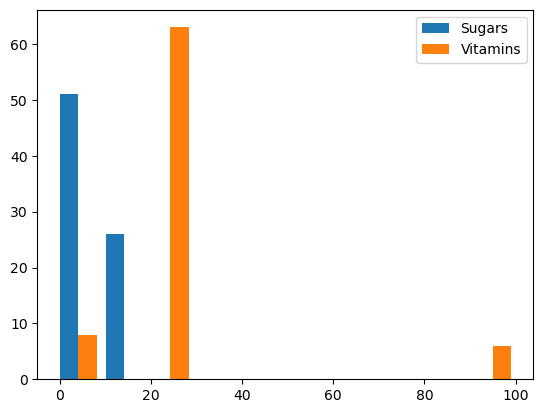

In [5]:
plt.hist([df['sugars'], df['vitamins']])
plt.legend(["Sugars", "Vitamins"])
plt.show()

In [7]:
manufacturers = {
    'N': 'Nabisco',
    'Q': 'Quaker Oats',
    'K': 'Kelloggs',
    'R': 'Raslston Purina',
    'G': 'General Mills',
    'P': 'Post',
    'A': 'American Home Foods Products'
}

df['manufacturers'] =  df['mfr'].map(lambda code: manufacturers.get(code, code))
df.head(5)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,manufacturers
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,Nabisco
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,Quaker Oats
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,Kelloggs
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,Kelloggs
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,Raslston Purina


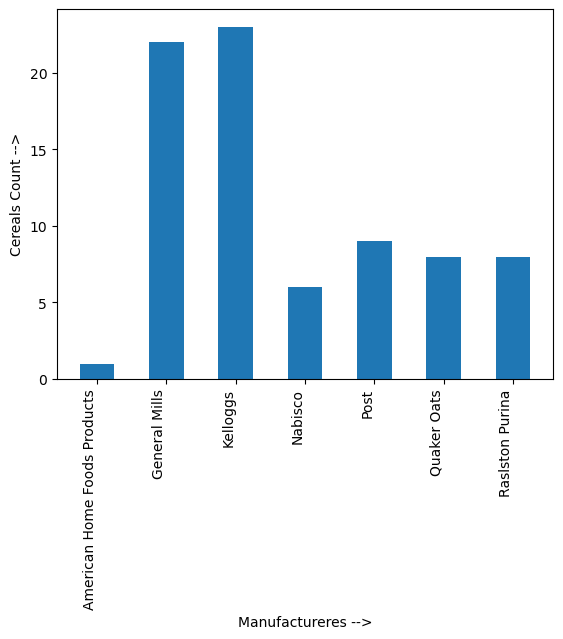

In [19]:
tdf = df.groupby('manufacturers', as_index=False).count()
plt.bar(tdf['manufacturers'], tdf['mfr'], width=0.5)
plt.setp(plt.gca().get_xticklabels(), rotation=90, horizontalalignment='right')
plt.xlabel("Manufactureres -->")
plt.ylabel("Cereals Count -->")
plt.show()

In [22]:
X = df.iloc[:, 3:15]
Y = df['rating']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=157)

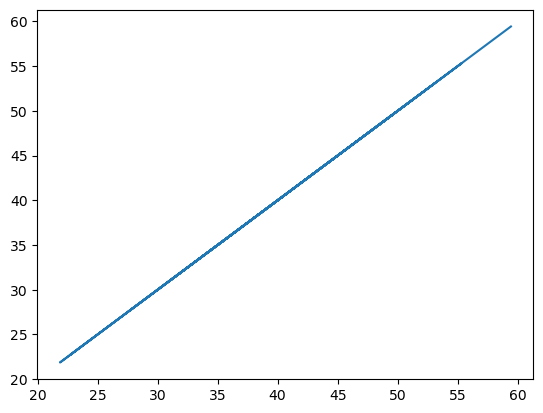

In [26]:
lrm = LinearRegression()
lrm.fit(x_train, y_train)
predicted_ratings = lrm.predict(x_test)

plt.plot(np.array(predicted_ratings), np.array(y_test))
plt.show()